In [385]:
from read_input2 import read_input
import math
import numpy
import time
import matplotlib.pyplot as plt
import random


## Lecture des données

In [386]:
start_time = time.time()

ville="GuineaGolf" #  changer 
ressources,ressources_unavailabilities,tasks,tasks_unavailabilities = read_input(1,ville)
# "Bordeaux", "Finland", "GuineaGolf", "Italy", "Poland"

In [387]:
def dist(lat1, long1, lat2, long2):
    """
    fonction renvoyant la distance en kms entre deux points décrits par leur latitude et longitude
    """
    if lat1==lat2 and long1==long2:
        return 0
    return(numpy.arccos(numpy.sin(2*numpy.pi/360*lat1)*numpy.sin(2*numpy.pi/360*lat2)+numpy.cos(2*numpy.pi/360*lat1)*numpy.cos(2*numpy.pi/360*lat2)*numpy.cos(2*numpy.pi/360*(long2-long1)))*6371)

v=5/6

L_ressources = [j for j in ressources] # tableau des objets ressources 
L_tasks = [i for i in tasks] # tableau des objets taches
number_of_ressources = len(L_ressources)
number_of_tasks = len(L_tasks)
dict_pos = {task : (task.latitude, task.longitude) for task in tasks.values()}

dict_pos = {task : (tasks[L_tasks[task]].latitude, tasks[L_tasks[task]].longitude) for task in range(number_of_tasks)}

#distance[a][b] donne la distance de la tâche a vers la tâche b
distances = [[dist(tasks[L_tasks[a]].latitude,tasks[L_tasks[a]].longitude, tasks[L_tasks[b]].latitude, tasks[L_tasks[b]].longitude) for b in range(number_of_tasks)] for a in range(number_of_tasks)]

#distance_m[j][i] donne la distance de la maison de j la tâche i
distances_m = [[dist(ressources[L_ressources[j]].latitude,ressources[L_ressources[j]].longitude, tasks[L_tasks[i]].latitude, tasks[L_tasks[i]].longitude) for i in range(number_of_tasks)] for j in range(number_of_ressources)]

## Functions

In [388]:
def generate_time(task_list,r):
    """
    input : list of tasks indices
    output : list of integers
    generates a time table from a list of ordered tasks
    # trajets debut et fin de journee
    """
    time=[]
    if len(task_list):
        time.append(tasks[L_tasks[task_list[0]]].openingTime+distances_m[r][task_list[0]]/v)
    for i in range(1,len(task_list)):
        time.append(max((tasks[L_tasks[task_list[i]]].openingTime,time[-1]+distances[task_list[i]][task_list[i-1]]/v+tasks[L_tasks[task_list[i-1]]].duration)))
    return(time)



In [389]:
def employees_by_level():
    """
    output : list of employees ids from level 1 to level 3
    """
    employees=[]
    for i in range(number_of_ressources):
        if ressources[L_ressources[i]].level==1:
            employees.append(i)
    for i in range(number_of_ressources):
        if ressources[L_ressources[i]].level==2:
            employees.append(i)
    for i in range(number_of_ressources):
        if ressources[L_ressources[i]].level==3:
            employees.append(i)
    return(employees)


In [390]:
def tasks_by_level():
    """
    output : list of tasks ids from level 1 to level 3
    """
    ordered_tasks=[]
    for i in range(number_of_tasks):
        if tasks[L_tasks[i]].level==1:
            ordered_tasks.append(i)
    for i in range(number_of_tasks):
        if tasks[L_tasks[i]].level==2:
            ordered_tasks.append(i)
    for i in range(number_of_tasks):
        if tasks[L_tasks[i]].level==3:
            ordered_tasks.append(i)
    return(ordered_tasks)

In [391]:
def is_feasible(employee,task_list,hours_list):
    """
    input : employee id, employee task list (by id), employee hours list (by id)
    true if feasible
    # add tasks and ressources unavailabilities
    # trajets debut et fin de journee
    """
    if hours_list[-1]+tasks[L_tasks[task_list[-1]]].duration>ressources[L_ressources[employee]].workingEnd:
        return False
    return True

In [392]:
def initial_task_assignementv1(ordered_tasks, ordered_employees):
    """
    output : list of the unattributed tasks (by id)
    modifies the attributes tasks and hours of the ressources to assign tasks to the employees
    # change the algo to avoid holes in the timetables
    # intégrer les conditions de la v2
    """
    unattributed_tasks=[]
    for t in ordered_tasks:
        unattributed = True
        r=0
        while unattributed and r<len(ordered_employees):
            if ressources[L_ressources[ordered_employees[r]]].level>=tasks[L_tasks[t]].level:
                tasks_tmp = ressources[L_ressources[ordered_employees[r]]].tasks.copy()
                tasks_tmp.append(t)
                hours_tmp = generate_time(tasks_tmp,ordered_employees[r])
                if is_feasible(r,tasks_tmp,hours_tmp):
                    ressources[L_ressources[ordered_employees[r]]].tasks = tasks_tmp
                    ressources[L_ressources[ordered_employees[r]]].hours = hours_tmp
                    unattributed=False
            r+=1
        if unattributed:
            unattributed_tasks.append(t)
    
    return(unattributed_tasks)

In [ ]:
def initial_task_assignementv2(ordered_tasks, ordered_employees):
    """
    output : list of the unattributed tasks (by id)
    modifies the attributes tasks and hours of the ressources to assign tasks to the employees
    takes into account the distance from the task to the employee
    # change the algo to avoid holes in the timetables
    # intégrer les conditions de la v2
    """
    unattributed_tasks=ordered_tasks
    while no_change:
    for t in ordered_tasks:
        unattributed = True
        r=0
        while unattributed and r<len(ordered_employees):
            if ressources[L_ressources[ordered_employees[r]]].level>=tasks[L_tasks[t]].level:
                tasks_tmp = ressources[L_ressources[ordered_employees[r]]].tasks.copy()
                tasks_tmp.append(t)
                hours_tmp = generate_time(tasks_tmp,ordered_employees[r])
                if is_feasible(r,tasks_tmp,hours_tmp):
                    ressources[L_ressources[ordered_employees[r]]].tasks = tasks_tmp
                    ressources[L_ressources[ordered_employees[r]]].hours = hours_tmp
                    unattributed=False
            r+=1
        if unattributed:
            unattributed_tasks.append(t)
    
    return(unattributed_tasks)

In [393]:
def objective_function():
    """
    returns the total objective function in time,
    -> the objective is to minimize it,
    """
    tot = 0
    for r in range(number_of_ressources):
        task_list = ressources[L_ressources[r]].tasks
        if len(task_list):
            tot+= (distances_m[r][task_list[0]]+distances_m[r][task_list[-1]])/v
        for i in range(len(task_list[:-1])):
            tot += distances[task_list[i]][task_list[i+1]]/v
    return tot

In [394]:
def mutation_intra(r, obj):
    """
    input : r (employee id), obj (current state objective function)
    output : returns true if a change has been made, and the updated objective function
    modifies the attributes tasks and hours of an employee to optimize his distances performing an intra tasks flip
    # faire plein de mutations au début et de moins en moins après
    # insérer une tâche 
    """
    i = 0
    obj_previous = obj
    change=False
    while i<1000: ### PARAMETER TO SET
        tasks_list = ressources[L_ressources[r]].tasks.copy() + ["start", "end"]
        ids = random.sample(tasks_list,2)
        a,b = ids[0],ids[1]
        if a=="start" and b!="end":
            tasks_list = ressources[L_ressources[r]].tasks.copy()
            tasks_list.remove(b)
            tasks_list = [b] + tasks_list
        elif b=="start" and a!="end":
            tasks_list = ressources[L_ressources[r]].tasks.copy()
            tasks_list.remove(a)
            tasks_list = [a] + tasks_list
        elif b!="start" and a=="end":
            tasks_list = ressources[L_ressources[r]].tasks.copy()
            tasks_list.remove(b)
            tasks_list = tasks_list + [b]
        elif a!="start" and b=="end":
            tasks_list = ressources[L_ressources[r]].tasks.copy()
            tasks_list.remove(a)
            tasks_list = tasks_list + [a]
        elif a!="start" and a!="end" and b!="start" and b!="end":
            tasks_list = ressources[L_ressources[r]].tasks.copy()
            ia,ib = tasks_list.index(a), tasks_list.index(b)
            tasks_list[ia], tasks_list[ib]=b, a

        if not(type(a)==str and type(b)==str):
            hours_tmp = generate_time(tasks_list,r)
            if is_feasible(r,tasks_list,hours_tmp):
                    obj_new = objective_function()
                    if obj_new < obj_previous:
                        ressources[L_ressources[r]].tasks = tasks_list
                        ressources[L_ressources[r]].hours = hours_tmp
                        obj_previous=obj_new
                        change = True
        i+=1
        
    return(change,obj_previous)
        


In [395]:
def mutation_inter(r1,r2,obj):
    """
    input : a,b, (employees ids), obj (current state objective function)
    output : returns true if a change has been made, and the updated objective function
    modifies the attributes tasks and hours of two employees to optimize distances
    # echanger aussi avec la reserve 
    # pour chaque mutation inter faire aussi des mutations intra avant de checker la faisabilité
    """
    i = 0
    change = False
    obj_previous = obj
    while i<1000: ### PARAMETER TO SET
        tasks_list1 = ressources[L_ressources[ordered_employees[r1]]].tasks.copy() + ["nothing"]
        tasks_list2 = ressources[L_ressources[ordered_employees[r2]]].tasks.copy() + ["nothing"]
        a = random.sample(tasks_list1,1)[0]
        b = random.sample(tasks_list2,1)[0]
        tasks_list1 = ressources[L_ressources[ordered_employees[r1]]].tasks.copy()
        tasks_list2 = ressources[L_ressources[ordered_employees[r2]]].tasks.copy()
        if b=="nothing" and a!="nothing":
            tasks_list1.remove(a)
            tasks_list2.insert(a,random.randint(0,len(tasks_list2)))
        elif a=="nothing" and b!="nothing":
            tasks_list2.remove(b)
            tasks_list1.insert(b,random.randint(0,len(tasks_list1)))
        elif a!="nothing" and b!="nothing":
            tasks_list1.remove(a)
            tasks_list2.remove(b)
            tasks_list2.insert(a,random.randint(0,len(tasks_list2)-1))
            tasks_list1.insert(b,random.randint(0,len(tasks_list1)-1))
        
        if not(type(a)==str and type(b)==str):
            hours_tmp1 = generate_time(tasks_list1,r1)
            hours_tmp2 = generate_time(tasks_list2,r2)
            if is_feasible(r1,tasks_list1,hours_tmp1) and is_feasible(r2,tasks_list2,hours_tmp2):
                    obj_new = objective_function()
                    if obj_new < obj_previous:
                        ressources[L_ressources[r1]].tasks = tasks_list1
                        ressources[L_ressources[r1]].hours = hours_tmp1
                        ressources[L_ressources[r2]].tasks = tasks_list2
                        ressources[L_ressources[r2]].hours = hours_tmp2
                        obj_previous=obj_new
                        change = True

        i+=1
    return(change,obj_previous)

In [396]:
def hacher():
    s=""
    for r in range(number_of_ressources):
        s+=str(ressources[L_ressources[r]].tasks)+"\n"
    return s

## Main code

In [397]:
ordered_tasks = tasks_by_level()
ordered_employees = employees_by_level()

# first task assignement generation
unattributed_tasks = initial_task_assignementv1(ordered_tasks, ordered_employees)

for r in range(number_of_ressources):
    assert len(ressources[L_ressources[ordered_employees[r]]].tasks) == len(ressources[L_ressources[ordered_employees[r]]].hours)


print("ATTRIBUTION INITIALE")
for r in range(number_of_ressources):
    print("attribution initiale pour", L_ressources[r])
    print(ressources[L_ressources[ordered_employees[r]]].tasks)
    print(ressources[L_ressources[ordered_employees[r]]].hours)

# mutations
start_time = time.time()
last_change = 0
time_exec = 0
i = 0
obj = objective_function()
while last_change<10000 and time_exec < 60*30: ### PARAMETER TO SET

    # mutation intra
    for r in range(number_of_ressources):
        change,obj=mutation_intra(r,obj)
    
    if change:
        last_change = 0
        print("has changed")
    else:
        last_change+=1


    # mutation inter
    if number_of_ressources>1:
        for r1 in range(number_of_ressources):
            for r2 in range(number_of_ressources):
                if r1 != r2:
                    change,obj=mutation_inter(r1,r2,obj)
    
    if change:
        last_change = 0
        print("has changed")
    else:
        last_change+=1

    time_exec = time.time() - start_time
    i+=1

print("ATTRIBUTION APRES MUTATION")
for r in range(number_of_ressources):
   print("attribution post mutation pour", L_ressources[r])
   print(ressources[L_ressources[ordered_employees[r]]].tasks)
   print(ressources[L_ressources[ordered_employees[r]]].hours)


ATTRIBUTION INITIALE
attribution initiale pour Tom
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[498.5113687353148, 538.8866803360784, 604.7051327844479, 648.0506945085962, 714.2938407331566, 775.4711628598133, 820.2955116160109, 879.5353003761106, 971.5724212116149]
ATTRIBUTION APRES MUTATION
attribution post mutation pour Tom
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[498.5113687353148, 538.8866803360784, 604.7051327844479, 648.0506945085962, 714.2938407331566, 775.4711628598133, 820.2955116160109, 879.5353003761106, 971.5724212116149]


## Checkers

In [398]:
# check que les techniciens ont le bon niveau et les bonnes compétences pour les tâches exécutées
a = True
for i in range(number_of_ressources):
    for j in range(number_of_tasks):
        if j in ressources[L_ressources[i]].tasks :
            # check que le skill est bon
            if ressources[L_ressources[i]].skill!=tasks[L_tasks[i]].skill:
                print("fail r,t ",i,j)
                a = False
            # check que le level est bon
            if ressources[L_ressources[i]].level < tasks[L_tasks[j]].level:
                print("fail r,t ",i,j)
                a = False
if a :
    print("Les techniciens ont bien les bonnes compétences et le bon niveau pour toutes les tâches exécutées")

Les techniciens ont bien les bonnes compétences et le bon niveau pour toutes les tâches exécutées


## Solution visualisation

In [399]:
y = {(r,a,b) : 0 for r in range(number_of_ressources) for a in range(number_of_tasks) for b in range(number_of_tasks)}
d = {(r,t) : 0 for r in range(number_of_ressources) for t in range(number_of_tasks)}
f = {(r,t) : 0 for r in range(number_of_ressources) for t in range(number_of_tasks)}

for r in range(number_of_ressources):
    taches = ressources[L_ressources[r]].tasks
    for i in range(len(taches)-1) :
        y[(r,taches[i],taches[i+1])]=1
    if len(taches)>0:
        d[(r,taches[0])]=1
        f[(r,taches[-1])]=1




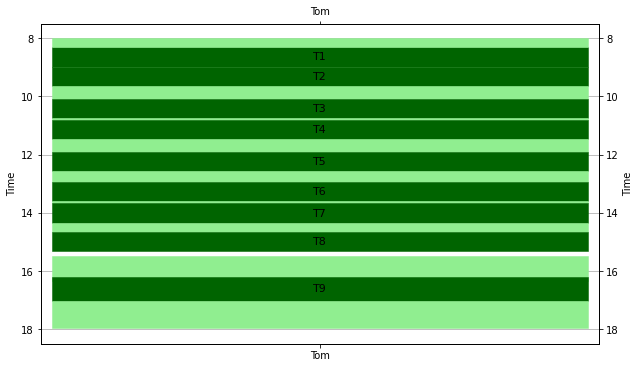

In [400]:
list_colors = ['darkgreen', 'blue', 'red', 'green', 'darkpurple', 'lightred', 'purple', 'pink', 'orange', 'darkblue', 'gray', 'darkred']
list_light_colors = ['lightgreen','lightblue','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow']


operators=[L_ressources[r] for r in range(number_of_ressources)]
colors=list_colors[0:number_of_ressources]
light_colors=list_light_colors[0:number_of_ressources]

fig=plt.figure(figsize=(10,5.89))

# Set Axis
ax=fig.add_subplot(111)
ax.yaxis.grid()
ax.set_xlim(0.5,len(operators)+0.5)
ax.set_ylim(18.5, 7.5)
ax.set_xticks(range(1,len(operators)+1))
ax.set_xticklabels(operators)
ax.set_ylabel('Time')

# Set Second Axis
ax2=ax.twiny().twinx()
ax2.invert_yaxis()
ax2.set_xlim(ax.get_xlim())
ax2.set_ylim(ax.get_ylim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(operators)
ax2.set_ylabel('Time')

for r in range(number_of_ressources):
    color_r = colors[r]
    light_color_r = light_colors[r]
    operator_room = r+1-0.48
    for a in range(number_of_tasks):
        if a in ressources[L_ressources[r]].tasks :
            event="T"+str(a+1)
            i = ressources[L_ressources[r]].tasks.index(a)
            start = ( ressources[L_ressources[r]].hours[i] )/60
            end = (ressources[L_ressources[r]].hours[i]+tasks[L_tasks[a]].duration)/60
            plt.fill_between([operator_room, operator_room+0.96], [start, start], [end,end], color=color_r, edgecolor='k', linewidth=0.5)
            #plt.text(operator_room+0.02, start+0.05 ,'{}:{}'.format(ressources[L_ressources[r]].hours[i]//60, ressources[L_ressources[r]].hours[i]%60), va='top', fontsize=6)
            #plt.text(operator_room+0.02, end-0.05,'{}:{}'.format((start+tasks[L_tasks[a]].duration)//60, (start+tasks[L_tasks[a]].duration)%60), va='bottom', fontsize=6)
            plt.text(operator_room+0.48, (start+end)*0.5, event, ha='center', va='center', fontsize=11)
        for b in range(number_of_tasks):
            if round(y[(r,a,b)]) == 1:
                i = ressources[L_ressources[r]].tasks.index(a)
                start = ( ressources[L_ressources[r]].hours[i] +tasks[L_tasks[b]].duration)/60
                end = start+(distances[a][b]/v)/60
                plt.fill_between([operator_room, operator_room+0.96], [start, start], [end,end], color=light_color_r, edgecolor='k', linewidth=0.5)
        if round(d[(r,a)]) == 1:
            i = ressources[L_ressources[r]].tasks.index(a)
            start = (ressources[L_ressources[r]].hours[i]-distances_m[r][a]/v)/60
            end = ressources[L_ressources[r]].hours[i]/60
            plt.fill_between([operator_room, operator_room+0.96], [start, start], [end,end], color=light_color_r, edgecolor='k', linewidth=0.5)
        if round(f[(r,a)]) == 1:
            i = ressources[L_ressources[r]].tasks.index(a)
            start=(ressources[L_ressources[r]].hours[i] + tasks[L_tasks[a]].duration)/60
            end=start+(distances_m[r][a]/v)/60
            plt.fill_between([operator_room, operator_room+0.96], [start, start], [end,end], color=light_color_r, edgecolor='k', linewidth=0.5)

plt.savefig('timetable_{}_V3.png'.format(ville), dpi=500, transparent=False)
plt.show()

In [401]:
unattributed_tasks

[]

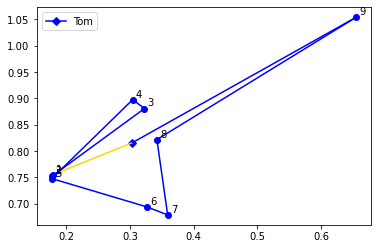

In [402]:
import matplotlib.pyplot as plt

list_colors = ['b','g','r','c','darkviolet','y','b','g','r','c','darkviolet','y','b','g','r','c','darkviolet','y','b','g','r','c','darkviolet','y']
list_light_colors = ['lightblue','lightgreen','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow']
number_of_colors = len(list_colors)
counter = 0
done_tasks=list()
for r in range(number_of_ressources):
  color_r = list_colors[counter % number_of_colors]
  plt.plot(ressources[L_ressources[r]].latitude,ressources[L_ressources[r]].longitude, color = color_r, marker="D", label=L_ressources[r])
  for a in range(number_of_tasks):
    for b in range(number_of_tasks):
      if round(y[(r,a,b)]) == 1:
        plt.plot([tasks[L_tasks[a]].latitude, tasks[L_tasks[b]].latitude], [tasks[L_tasks[a]].longitude, tasks[L_tasks[b]].longitude], color = color_r)
    if round(d[(r,a)]) == 1:
      plt.plot([tasks[L_tasks[a]].latitude, ressources[L_ressources[r]].latitude], [tasks[L_tasks[a]].longitude, ressources[L_ressources[r]].longitude], color = 'gold')
    if round(f[(r,a)]) == 1:
      plt.plot([tasks[L_tasks[a]].latitude, ressources[L_ressources[r]].latitude], [tasks[L_tasks[a]].longitude, ressources[L_ressources[r]].longitude], color = color_r)
    if a in ressources[L_ressources[r]].tasks :
      done_tasks.append(a)
      plt.plot(tasks[L_tasks[a]].latitude, tasks[L_tasks[a]].longitude, color = color_r, marker="o")
      plt.annotate(str(a+1), [tasks[L_tasks[a]].latitude+0.005, tasks[L_tasks[a]].longitude+0.005])
  counter+=1

for t in range(number_of_tasks):
  if t not in done_tasks:
    plt.plot(tasks[L_tasks[t]].latitude, tasks[L_tasks[t]].longitude, color = 'black', marker="o")
    plt.annotate(str(t+1), [tasks[L_tasks[t]].latitude+0.005, tasks[L_tasks[t]].longitude+0.005])
plt.legend()
plt.savefig('parcours_{}_V3.png'.format(ville), dpi=500, transparent=False)
plt.show()